In [1]:
# Imports
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib widget 
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

# Suppress warnings for cleaner output
import warnings 
warnings.filterwarnings('ignore')

sys.path.append(os.path.abspath(".."))

# Import our advanced helper package
from ml_helpers import (
    clean_data, encode_categorical, scale_features, split_features_target,
    automated_eda, suggest_ml_prep,
    plot_histogram, plot_correlation_matrix,
    plot_boxplot, plot_pairplot, plot_interactive_histogram,
    plot_confusion, plot_roc, plot_precision_recall,
)

In [2]:
# --- 2. Load Dataset ---
df = sns.load_dataset("iris")  # Multiclass dataset
print("First 5 rows:")
display(df.head())

First 5 rows:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# --- 3. Automated EDA ---
print("\nAutomated EDA Summary:")
eda_summary = automated_eda(df)
display(eda_summary)


Automated EDA Summary:


,dtype,missing,unique,mean,std,min,max
petal_length,float64,0,43,3.758000,1.765298,1.0,6.9
petal_width,float64,0,22,1.199333,0.762238,0.1,2.5
sepal_length,float64,0,35,5.843333,0.828066,4.3,7.9
sepal_width,float64,0,23,3.057333,0.435866,2.0,4.4
species,object,0,3,NaN,NaN,NaN,NaN


In [4]:
# --- 4. ML Prep Suggestions ---
print("\nSuggested ML preprocessing:")
suggestions = suggest_ml_prep(df)
display(suggestions)


Suggested ML preprocessing:


{'sepal_length': ['scale', 'check_outliers'],
 'sepal_width': ['scale', 'check_outliers'],
 'petal_length': ['scale', 'check_outliers'],
 'petal_width': ['scale', 'check_outliers'],
 'species': ['encode_categorical']}

In [5]:
# --- 5. Preprocessing ---
df_clean = clean_data(df)            # Handle missing values
df_encoded = encode_categorical(df_clean)  # Encode categorical features

# Separate target before scaling features
target_col = 'species'
y = df_encoded[target_col]           # Keep target as categorical labels
X = df_encoded.drop(columns=[target_col])

# Scale only numeric features
X_scaled = scale_features(X)

print("Features and target ready for ML:")
display(X_scaled.head())
display(y.head())

Features and target ready for ML:


,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [6]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 120, Test samples: 30


In [7]:
# Train classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)          

# Predict
y_pred = model.predict(X_test)

In [8]:
# --- 8. Model Evaluation ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 1.00


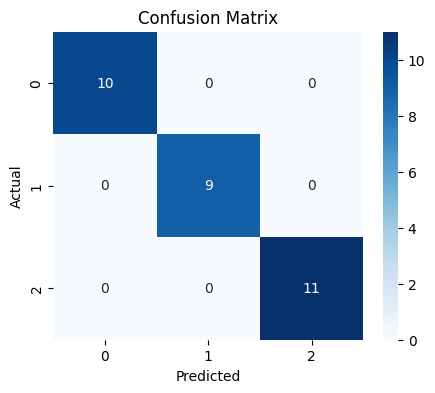

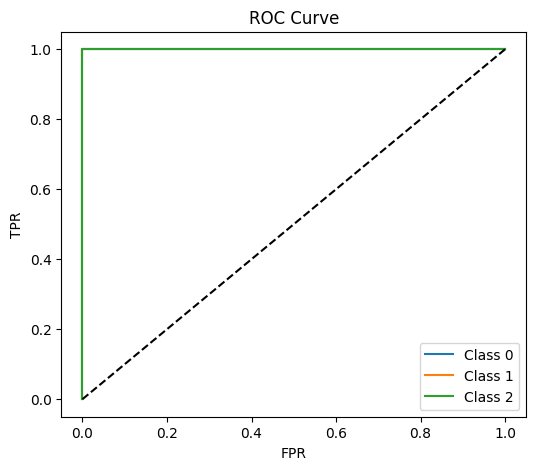

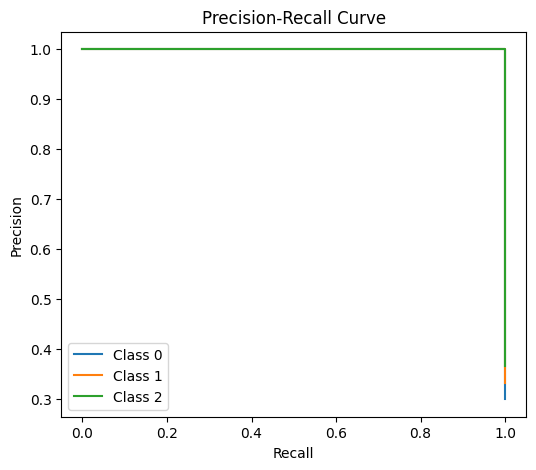

In [9]:
# --- 9. Advanced Model Visualizations ---
plot_confusion(y_test, y_pred)

# For ROC/Precision-Recall, we need one-hot labels for multiclass
classes = y.unique()
y_test_bin = label_binarize(pd.factorize(y_test)[0], classes=range(len(classes)))
y_pred_bin = label_binarize(pd.factorize(y_pred)[0], classes=range(len(classes)))

plot_roc(y_test_bin, y_pred_bin, classes=classes)
plot_precision_recall(y_test_bin, y_pred_bin, classes=classes)


Feature Visualizations:


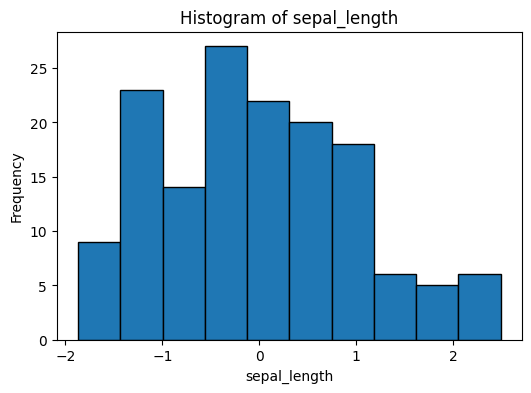

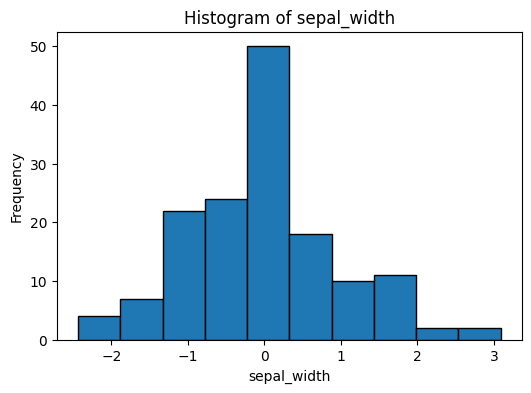

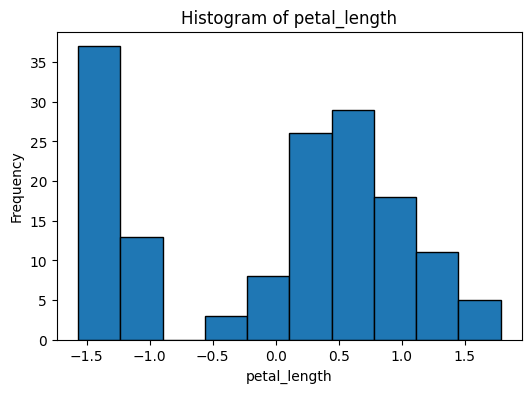

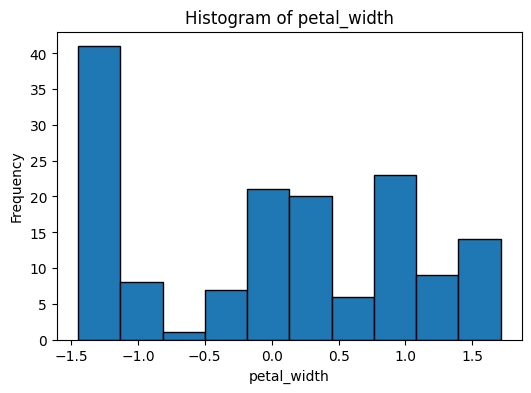

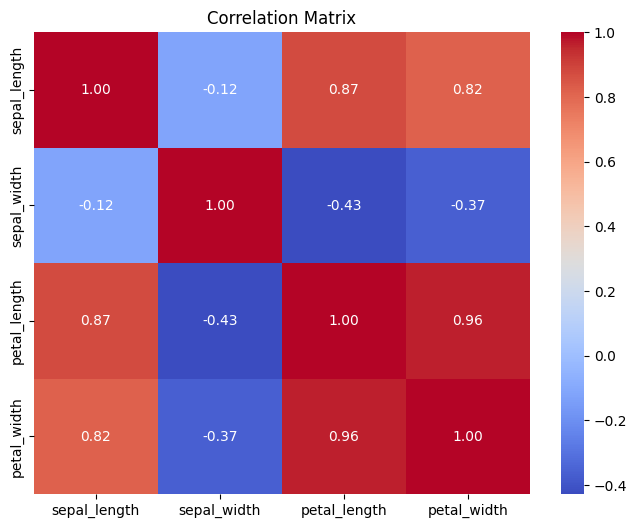

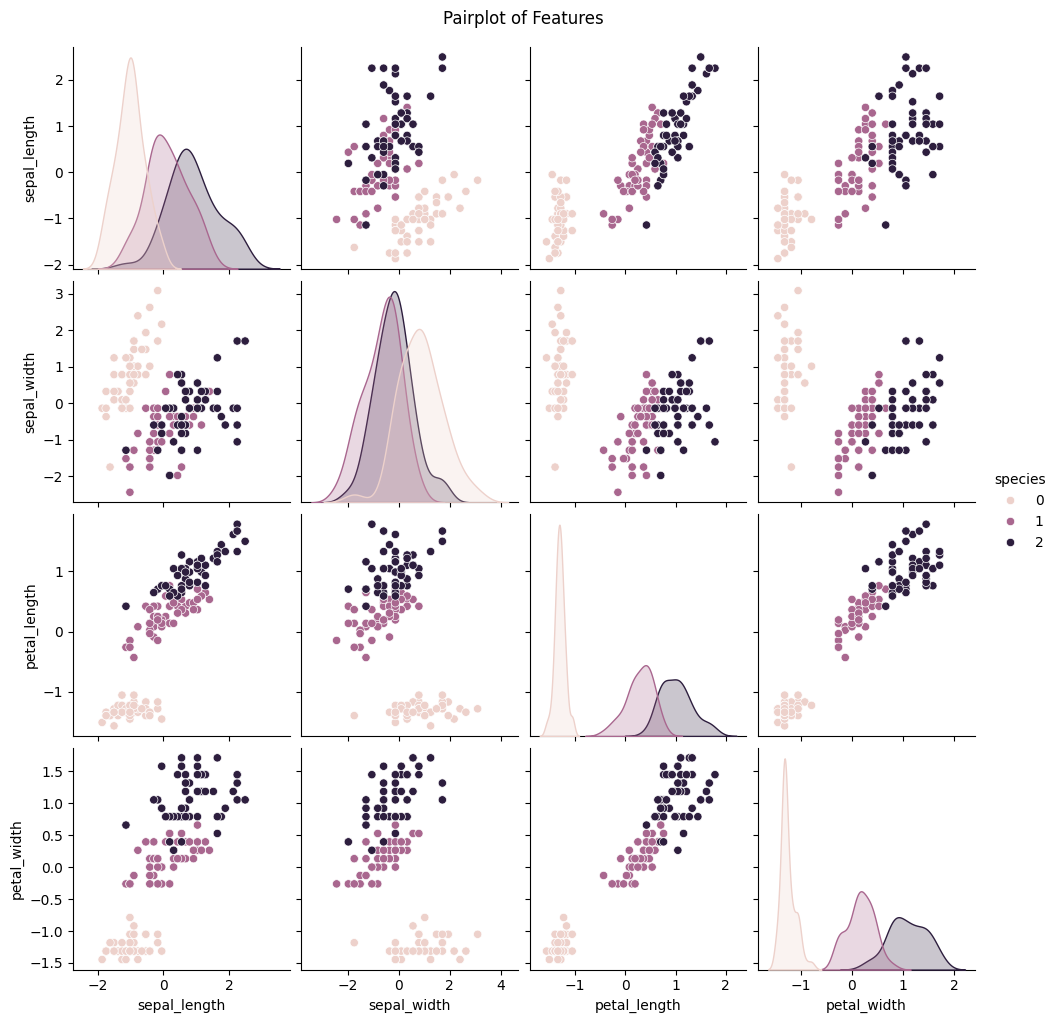

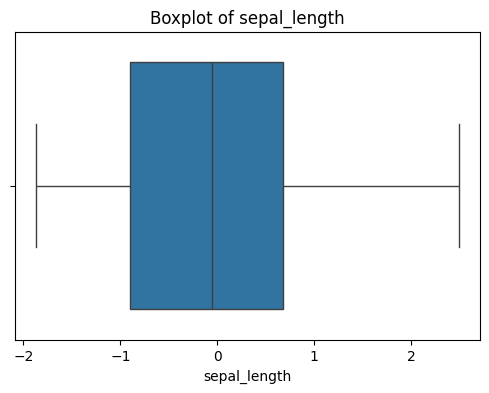

In [10]:
print("\nFeature Visualizations:")

# Combine X_scaled and target for visualizations
df_viz = X_scaled.copy()
df_viz[target_col] = y.values  # add target for hue

# Histograms for all numeric features
for col in X_scaled.columns:
    plot_histogram(df_viz[col])

# Correlation heatmap
plot_correlation_matrix(X_scaled)

# Pairplot with target hue
plot_pairplot(df_viz, hue=target_col)

# Boxplot example
plot_boxplot(df_viz, column='sepal_length')

# Interactive histogram example
plot_interactive_histogram(df_viz, column='petal_length')